In [3]:
text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'

tokens = [x for x in text.split(' ')]
print(tokens)
unique = set(tokens)
unique = list(unique)
print(unique)
token2idx={}
for i in range(len(unique)):
  token2idx[unique[i]]=i
print(token2idx)
encode = [token2idx[x] for x in tokens]
encode

['평생', '살', '것처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '것처럼', '오늘을', '살아라.']
['내일', '살아라.', '꾸어라.', '살', '것처럼', '오늘을', '죽을', '꿈을', '그리고', '평생']
{'내일': 0, '살아라.': 1, '꾸어라.': 2, '살': 3, '것처럼': 4, '오늘을': 5, '죽을': 6, '꿈을': 7, '그리고': 8, '평생': 9}


[9, 3, 4, 7, 2, 8, 0, 6, 4, 5, 1]

[과제] 상기 작업을 keras를 이용하여 수행하세요.

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

num_words = 1000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
for i in range(10):
    if y_train[i] == 0:
        label = '부정'
    else:
        label = '긍정'
    print('{}\n{}'.format(x_train[i], label))

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')


# 전처리 확인하기
print(len(x_train[5])) # 43
print(len(pad_x_train[5])) # 100
# 길이가 잘 맞춰진 것을 알 수 있음 (나머지 57개는 맨 앞에 0 57개로 채워짐)

print(len(x_train[1])) # 189
print(len(pad_x_train[1])) # 100
# 이 경우에는 데이터가 잘림

43
100
189
100


In [8]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32,input_length=max_len))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history=model.fit(pad_x_train, y_train,
                 epochs=10,
                 batch_size=32,
                 validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5592 - acc: 0.7201 - val_loss: 0.4147 - val_acc: 0.8126
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3715 - acc: 0.8346 - val_loss: 0.3805 - val_acc: 0.8258
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3355 - acc: 0.8550 - val_loss: 0.3804 - val_acc: 0.8304
Epoch 4/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3081 - acc: 0.8701 - val_loss: 0.4026 - val_acc: 0.8186
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2781 - acc: 0.8877 - val_loss: 0.3951 - val_acc: 0.8230
Epoch 6/10
625/625 [==============================] - 2s 2ms/step - loss: 0.2447 - acc: 0.9053 - val_loss: 0.4151 - val_acc: 0.8154
Epoch 7/10
625/625 [==============================] - 2s 2ms/step - loss: 0.2115 - acc: 0.9243 - val_loss: 0.4221 - val_acc: 0.8116
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

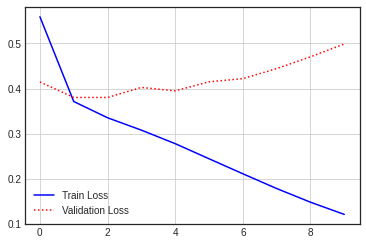

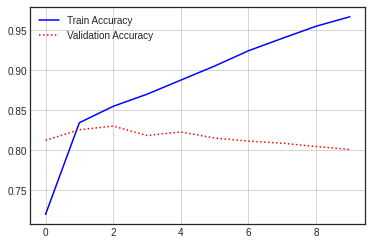

In [14]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
hist_dict = history.history

plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()


[과제]
num_words = 2000, max_len=400

In [15]:
num_words = 2000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

In [17]:
max_len = 400

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32,input_length=max_len))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history=model.fit(pad_x_train, y_train,
                 epochs=10,
                 batch_size=32,
                 validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 6s 7ms/step - loss: 0.5002 - acc: 0.7531 - val_loss: 0.3363 - val_acc: 0.8616
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2781 - acc: 0.8842 - val_loss: 0.3008 - val_acc: 0.8766
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2259 - acc: 0.9115 - val_loss: 0.3170 - val_acc: 0.8672
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1813 - acc: 0.9335 - val_loss: 0.3137 - val_acc: 0.8732
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1397 - acc: 0.9531 - val_loss: 0.3359 - val_acc: 0.8676
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1036 - acc: 0.9685 - val_loss: 0.3593 - val_acc: 0.8654
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0740 - acc: 0.9802 - val_loss: 0.3860 - val_acc: 0.8598
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 0.

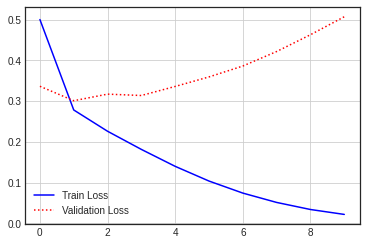

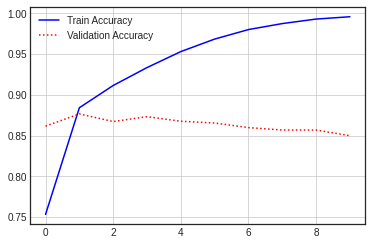

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
hist_dict = history.history

plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()